In [3]:
import os
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Ensure output directory exists
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

def load_txt2img_model():
    """Loads Stable Diffusion 2.1 text-to-image model."""
    print("🚀 Loading Stable Diffusion 2.1 text-to-image model...")
    pipe = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1",
        torch_dtype=torch.float16
    ).to("cuda" if torch.cuda.is_available() else "cpu")
    print("✅ Model loaded successfully.")
    return pipe

def generate_bird_feeder_images():
    """Generates images of squirrels competing with birds at a bird feeder."""
    pipe = load_txt2img_model()

    prompts = [
        "A squirrel and a bird fighting over food at a bird feeder in a lush green backyard, realistic lighting",
        "A cheeky squirrel stealing seeds from a bird feeder while a bird watches from the sky, realistic wildlife photography",
        "3 squirrels and 2 birds aggressively competing at a bird feeder, feathers and fur flying, professional wildlife shot",
        "A cute squirrel hanging upside down on a bird feeder while birds try to eat, taken with a high-quality camera",
        "A group of birds and squirrels in a humorous standoff at a bird feeder, National Geographic photography style"
    ]

    seed = 42  # Set seed for reproducibility
    generator = torch.Generator(device="cuda").manual_seed(seed)

    generated_images = []
    
    for i, prompt in enumerate(prompts):
        print(f"🎨 Generating image {i+1}/5: {prompt}")

        image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, generator=generator).images[0]

        save_path = os.path.join(output_dir, f"bird_feeder_squirrels_{i+1}.jpg")
        image.save(save_path)
        generated_images.append(save_path)
        print(f"💾 Saved: {save_path}")

    return generated_images

# Example usage
if __name__ == "__main__":
    generated_images = generate_bird_feeder_images()
    print("🎉 Bird feeder images generated successfully!")
    print("🖼️ Final Saved Images:", generated_images)


🚀 Loading Stable Diffusion 2.1 text-to-image model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model loaded successfully.
🎨 Generating image 1/5: A squirrel and a bird fighting over food at a bird feeder in a lush green backyard, realistic lighting


  0%|          | 0/50 [00:00<?, ?it/s]

💾 Saved: images/bird_feeder_squirrels_1.jpg
🎨 Generating image 2/5: A cheeky squirrel stealing seeds from a bird feeder while a bird watches from the sky, realistic wildlife photography


  0%|          | 0/50 [00:00<?, ?it/s]

💾 Saved: images/bird_feeder_squirrels_2.jpg
🎨 Generating image 3/5: 3 squirrels and 2 birds aggressively competing at a bird feeder, feathers and fur flying, professional wildlife shot


  0%|          | 0/50 [00:00<?, ?it/s]

💾 Saved: images/bird_feeder_squirrels_3.jpg
🎨 Generating image 4/5: A cute squirrel hanging upside down on a bird feeder while birds try to eat, taken with a high-quality camera


  0%|          | 0/50 [00:00<?, ?it/s]

💾 Saved: images/bird_feeder_squirrels_4.jpg
🎨 Generating image 5/5: A group of birds and squirrels in a humorous standoff at a bird feeder, National Geographic photography style


  0%|          | 0/50 [00:00<?, ?it/s]

💾 Saved: images/bird_feeder_squirrels_5.jpg
🎉 Bird feeder images generated successfully!
🖼️ Final Saved Images: ['images/bird_feeder_squirrels_1.jpg', 'images/bird_feeder_squirrels_2.jpg', 'images/bird_feeder_squirrels_3.jpg', 'images/bird_feeder_squirrels_4.jpg', 'images/bird_feeder_squirrels_5.jpg']


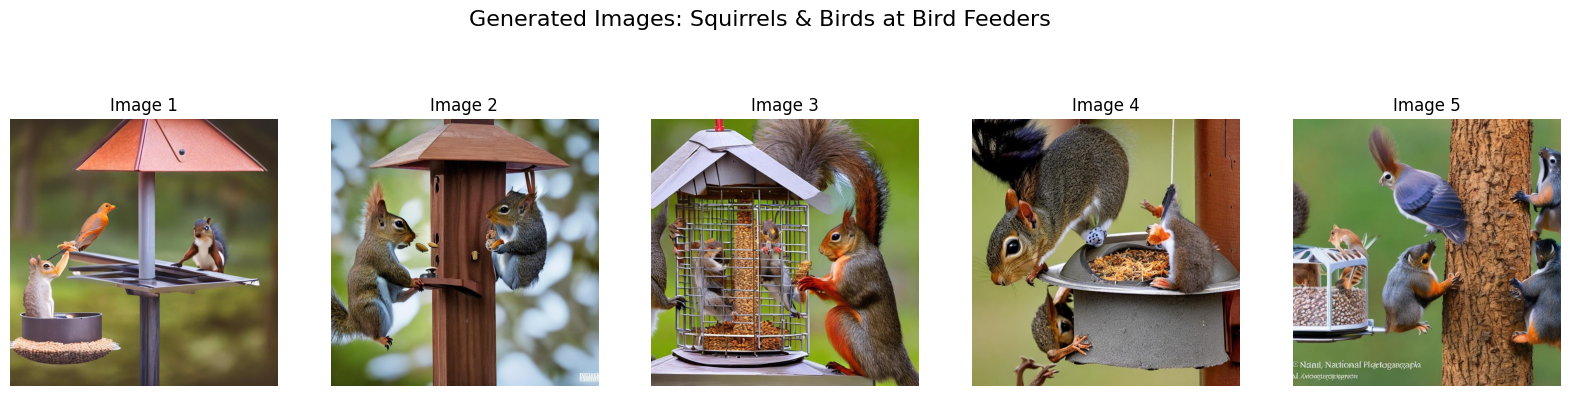

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Directory where images are saved
output_dir = "images"

# Filenames of generated images
image_filenames = [
    "bird_feeder_squirrels_1.jpg",
    "bird_feeder_squirrels_2.jpg",
    "bird_feeder_squirrels_3.jpg",
    "bird_feeder_squirrels_4.jpg",
    "bird_feeder_squirrels_5.jpg"
]

def visualize_generated_images():
    """Displays the generated images with their respective prompts."""
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    
    for i, filename in enumerate(image_filenames):
        img_path = os.path.join(output_dir, filename)
        if os.path.exists(img_path):
            image = Image.open(img_path)
            axes[i].imshow(image)
            axes[i].set_title(f"Image {i+1}")
            axes[i].axis("off")
        else:
            print(f"⚠️ Warning: {img_path} not found!")

    plt.suptitle("Generated Images: Squirrels & Birds at Bird Feeders", fontsize=16)
    plt.show()

# Run visualization
visualize_generated_images()
